In [15]:
import numpy as np


boxes=np.array([[100,100,210,210,0.72],
        [250,250,420,420,0.8],
        [220,220,320,330,0.92],
        [100,100,210,210,0.72],
        [230,240,325,330,0.81],
        [220,230,315,340,0.9]]) 


def py_cpu_nms(dets, thresh):
    # dets:(m,5)  thresh:scaler
    
    x1 = dets[:,0]
    y1 = dets[:,1]
    x2 = dets[:,2]
    y2 = dets[:,3]
    
    areas = (y2-y1+1) * (x2-x1+1)
    scores = dets[:,4]
    D = []
    
    index = scores.argsort()[::-1]
    
    while index.size >0:

        i = index[0]       # every time the first is the biggst, and add it directly
        D.append(i)
        
        x11 = np.maximum(x1[i], x1[index[1:]])    # calculate the points of overlap 
        y11 = np.maximum(y1[i], y1[index[1:]])
        x22 = np.minimum(x2[i], x2[index[1:]])
        y22 = np.minimum(y2[i], y2[index[1:]])
        
        w = np.maximum(0, x22-x11+1)    # the weights of overlap
        h = np.maximum(0, y22-y11+1)    # the height of overlap
       
        overlaps = w*h
        
        ious = overlaps / (areas[i]+areas[index[1:]] - overlaps)
        
        idx = np.where(ious<=thresh)[0]
        
        index = index[idx+1]   # because index start from 1
        
    return D
        

import matplotlib.pyplot as plt
def plot_bbox(dets, c='k'):
    
    x1 = dets[:,0]
    y1 = dets[:,1]
    x2 = dets[:,2]
    y2 = dets[:,3]
    
    
    plt.plot([x1,x2], [y1,y1], c)
    plt.plot([x1,x1], [y1,y2], c)
    plt.plot([x1,x2], [y2,y2], c)
    plt.plot([x2,x2], [y1,y2], c)


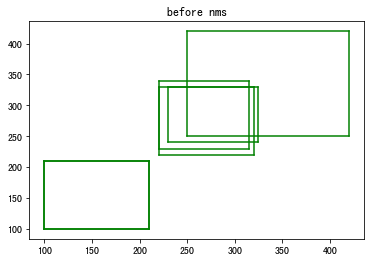

In [18]:
plt.title("before nms")
plot_bbox(boxes,'g')   # before nms


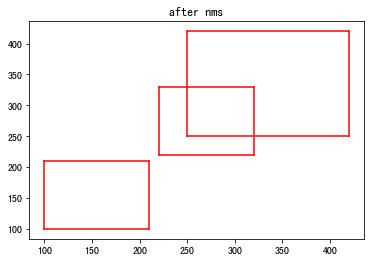

In [17]:
D = py_cpu_nms(boxes, thresh=0.7)

plt.title("after nms")
plot_bbox(boxes[D], 'r')# after nms

In [26]:
import time
#from nms.nums_py import py_cpu_nms  # for cpu
#from nms.gpu_nms import gpu_nms   # for gpu 


np.random.seed( 1 )   # keep fixed
num_rois = 6000
minxy = np.random.randint(50,145,size=(num_rois ,2))
maxxy = np.random.randint(150,200,size=(num_rois ,2))
score = 0.8*np.random.random_sample((num_rois ,1))+0.2

boxes_new = np.concatenate((minxy,maxxy,score), axis=1).astype(np.float32)

def nms_test_time(boxes_new):

    thresh = [0.7,0.8,0.9]
    T = 50
    for i in range(len(thresh)):  
        
        since = time.time()
        for t in range(T):

            D = py_cpu_nms(boxes_new, thresh=thresh[i])     # for cpu
#            D = gpu_nms(boxes_new, thresh=thresh[i])       # for gpu
        print("thresh={:.1f}, time wastes:{:.4f}".format(thresh[i], (time.time()-since)/T))
   
    return D


In [27]:
nms_test_time(boxes_new)

thresh=0.7, time wastes:0.0531
thresh=0.8, time wastes:0.2076
thresh=0.9, time wastes:0.9370


[5349,
 3234,
 949,
 4050,
 3880,
 605,
 2845,
 5238,
 1587,
 606,
 2677,
 5969,
 4604,
 5276,
 5471,
 3271,
 1439,
 3102,
 261,
 3940,
 3390,
 4855,
 5444,
 5610,
 716,
 1997,
 1881,
 2108,
 3576,
 34,
 5848,
 3579,
 5719,
 3101,
 4802,
 1945,
 3990,
 3072,
 4908,
 269,
 3761,
 1868,
 3168,
 4154,
 5669,
 4896,
 1924,
 4489,
 4661,
 2708,
 4224,
 5667,
 556,
 5468,
 2081,
 2041,
 2619,
 2355,
 2953,
 4397,
 833,
 2878,
 1645,
 1333,
 1438,
 5792,
 3408,
 562,
 4216,
 530,
 2237,
 735,
 1351,
 2022,
 1486,
 3045,
 4430,
 1257,
 2219,
 443,
 5097,
 1165,
 447,
 4566,
 3466,
 2977,
 2407,
 246,
 5678,
 4380,
 402,
 992,
 5192,
 2425,
 5082,
 2729,
 4183,
 5503,
 4579,
 3454,
 1386,
 4058,
 2810,
 3035,
 3484,
 1777,
 950,
 90,
 5822,
 3520,
 4706,
 2300,
 4918,
 3530,
 3628,
 487,
 5236,
 5794,
 2824,
 4235,
 5615,
 3566,
 5340,
 3561,
 3321,
 1421,
 2329,
 4521,
 3807,
 1402,
 2749,
 3363,
 1048,
 2286,
 4669,
 5620,
 3777,
 4833,
 3749,
 5322,
 5962,
 652,
 3300,
 291,
 119,
 4903,
 46